<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1557536921.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1557536921.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     2.730120e+06
1     3.333932e+06
2     4.743915e+06
3     2.871986e+06
4     3.649480e+06
5     2.988750e+06
6     4.568262e+06
7     4.931064e+06
8     5.028326e+06
9     5.774337e+06
10    3.402789e+06
11    3.881077e+06
12    4.925515e+06
13    3.247982e+06
14    4.217962e+06
15    4.501855e+06
16    4.896393e+06
17    4.172760e+06
18    6.021245e+06
Name: Age_Solid, dtype: float64


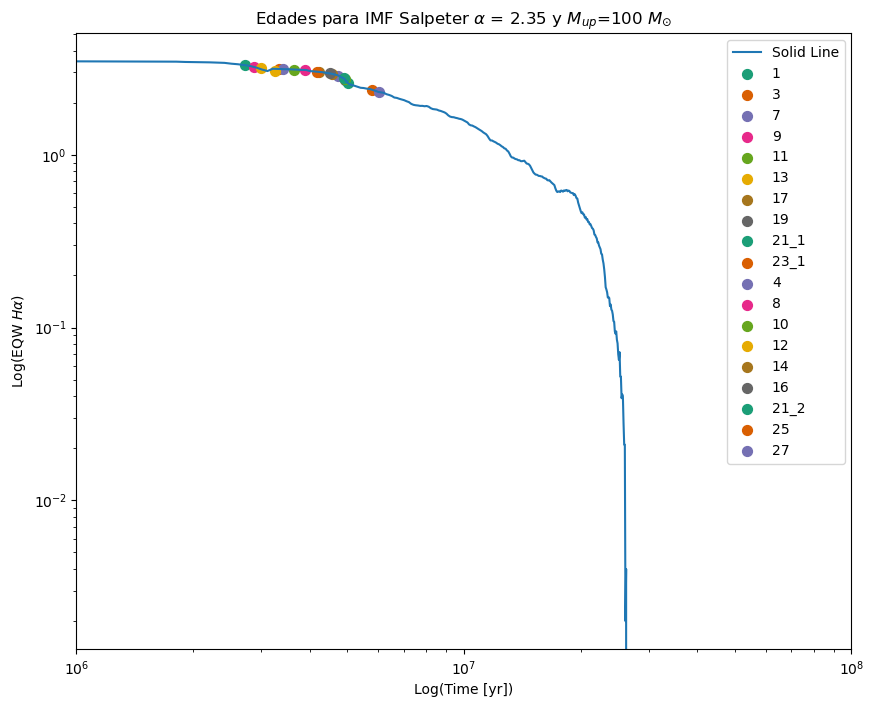

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


/tmp/ipykernel_6910/1706341352.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     2.730120e+06
1     3.333932e+06
2     4.743915e+06
3     2.871986e+06
4     3.649480e+06
5     2.988750e+06
6     4.568262e+06
7     4.931064e+06
8     5.028326e+06
9     5.774337e+06
10    3.402789e+06
11    3.881077e+06
12    4.925515e+06
13    3.247982e+06
14    4.217962e+06
15    4.501855e+06
16    4.896393e+06
17    4.172760e+06
18    6.021245e+06
Name: Age_Solid, dtype: float64


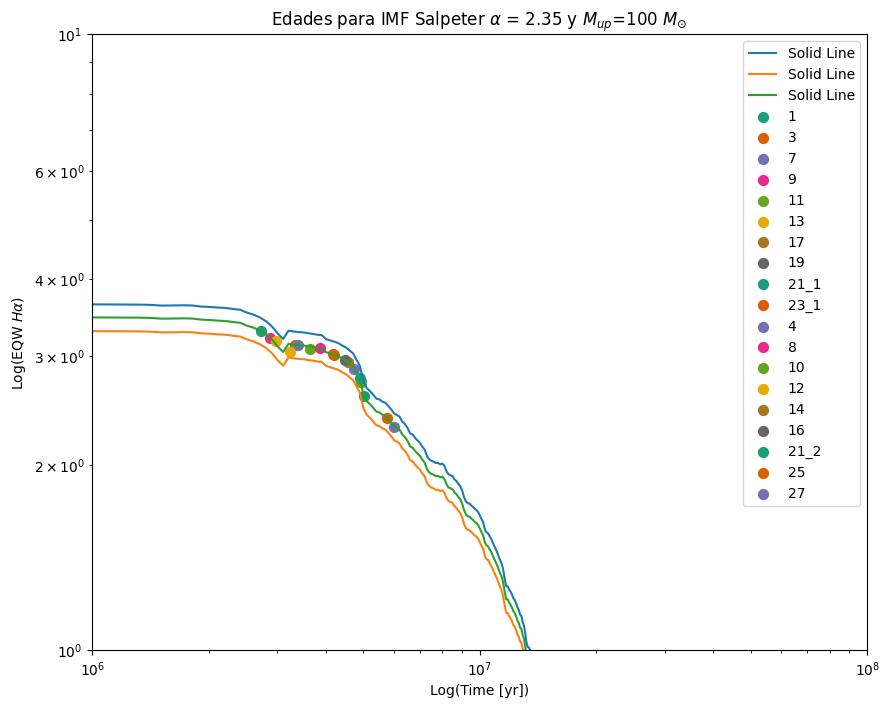

In [10]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
test = starburst_data['Solid']*1.05
test2 = starburst_data['Solid']*0.95

interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])


eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], test, '-', label='Solid Line')
plt.plot(starburst_data['Time'], test2, '-', label='Solid Line')

plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.ylim(1,10)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/80568765.py:45: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/80568765.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     7.197250e+06
1     2.480112e+06
2     4.207402e+06
3     3.407444e+06
4     2.797279e+06
5     1.347498e+06
6     3.881132e+06
7     4.812671e+06
8     4.985967e+06
9     5.776635e+06
10    2.493023e+06
11    2.736623e+06
12    4.796034e+06
13    2.910414e+06
14    2.997011e+06
15    3.758382e+06
16    4.733114e+06
17    2.979693e+06
18    6.027162e+06
Name: Age_LongDashed, dtype: float64


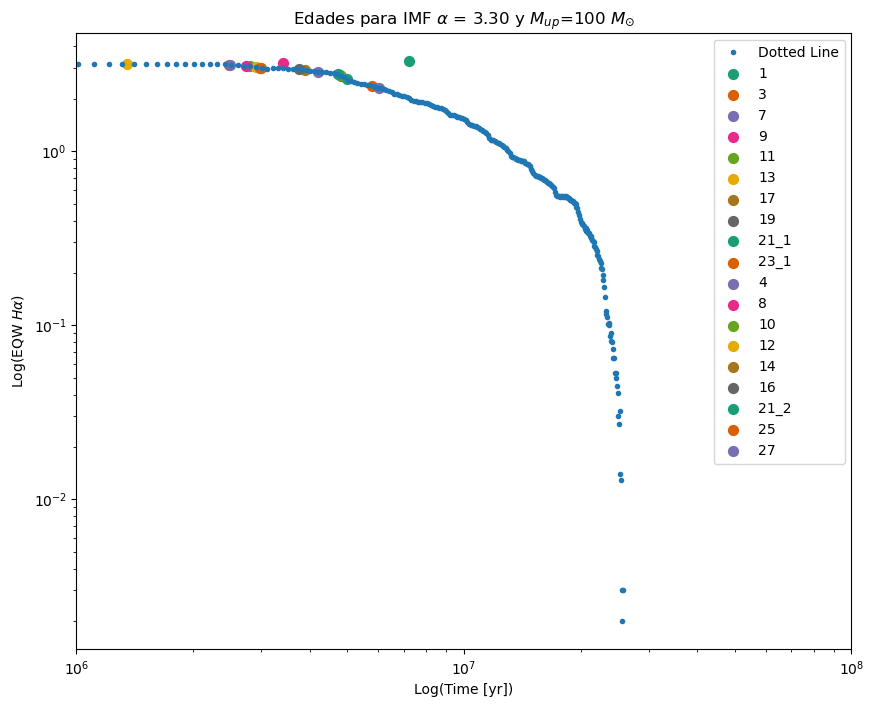

In [5]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['LongDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_LongDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))

print(eqw_data['Age_LongDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['LongDashed'], '.', label='Dotted Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_LongDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1748176460.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1748176460.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     4.923350e+07
1     8.792300e+05
2     6.020961e+06
3     2.649467e+07
4     3.629330e+06
5     1.537250e+07
6     5.760755e+06
7     6.416041e+06
8     6.548583e+06
9     6.695912e+06
10    7.018358e+05
11    3.480463e+06
12    6.402776e+06
13    3.958870e+06
14    4.734054e+06
15    5.646551e+06
16    6.347321e+06
17    4.579027e+06
18    6.759645e+06
Name: Age_ShortDashed, dtype: float64


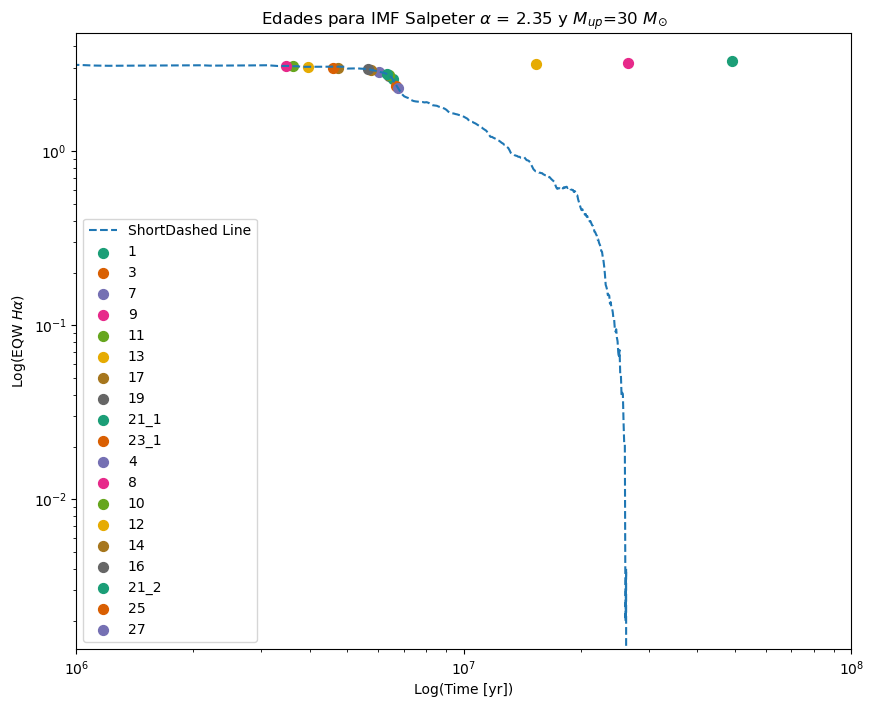

In [3]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['ShortDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_ShortDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_ShortDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['ShortDashed'], '--', label='ShortDashed Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_ShortDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
plt.legend()
plt.show()

In [6]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Parámetros cosmológicos
H0 = 67.8  # Constante de Hubble en km/s/Mpc, de NED
Om0 = 0.308  # Densidad de materia en el universo plano (puedes ajustar según lo necesario)
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Redshift de la galaxia
z = 0.001568

# Calcular la distancia de luminosidad en Mpc
D = cosmo.angular_diameter_distance(z).value  # en Mpc

# Distancia angular en arcsec
# para las regiones SF observadas (de ds9)
theta_arcsec_4 = 219.844
theta_arcsec_8 = 186.082
theta_arcsec_10 = 189.255
theta_arcsec_12 = 164.417
theta_arcsec_14 = 243.849
theta_arcsec_16 = 246.580
theta_arcsec_21_2 = 219.152
theta_arcsec_25 = 193.262
theta_arcsec_27 = 219.101

theta_arcsec_1 = 70.135
theta_arcsec_3 = 77.639
theta_arcsec_5 = 80.253 #79.437 (cuando pongo línea al inicio de la SF region, si la pongo en la max intensidad de Ha entonces 80)
theta_arcsec_7 = 44.245
theta_arcsec_9 = 73.598
theta_arcsec_11 = 82.945
theta_arcsec_13 = 132.034
theta_arcsec_15 = 16.404
theta_arcsec_17 = 152.517
theta_arcsec_19 = 95.697
theta_arcsec_21 = 68.644
theta_arcsec_23 = 53.192

# Convertir arcsec a radianes

theta_rad_4 = theta_arcsec_4 * u.arcsec.to(u.radian)
theta_rad_8 = theta_arcsec_8 * u.arcsec.to(u.radian)
theta_rad_10 = theta_arcsec_10 * u.arcsec.to(u.radian)
theta_rad_12 = theta_arcsec_12 * u.arcsec.to(u.radian)
theta_rad_14 = theta_arcsec_14 * u.arcsec.to(u.radian)
theta_rad_16 = theta_arcsec_16 * u.arcsec.to(u.radian)
theta_rad_21_2 = theta_arcsec_21_2 * u.arcsec.to(u.radian)
theta_rad_25 = theta_arcsec_25 * u.arcsec.to(u.radian)
theta_rad_27 = theta_arcsec_27 * u.arcsec.to(u.radian)

theta_rad_1 = theta_arcsec_1 * u.arcsec.to(u.radian)
theta_rad_3 = theta_arcsec_3 * u.arcsec.to(u.radian)
theta_rad_5 = theta_arcsec_5 * u.arcsec.to(u.radian)
theta_rad_7 = theta_arcsec_7 * u.arcsec.to(u.radian)
theta_rad_9 = theta_arcsec_9 * u.arcsec.to(u.radian)
theta_rad_11 = theta_arcsec_11 * u.arcsec.to(u.radian)
theta_rad_13 = theta_arcsec_13 * u.arcsec.to(u.radian)
theta_rad_15 = theta_arcsec_15 * u.arcsec.to(u.radian)
theta_rad_17 = theta_arcsec_17 * u.arcsec.to(u.radian)
theta_rad_19 = theta_arcsec_19 * u.arcsec.to(u.radian)
theta_rad_21 = theta_arcsec_21 * u.arcsec.to(u.radian)
theta_rad_23 = theta_arcsec_23 * u.arcsec.to(u.radian)

# Calcular la distancia física en kpc
d_kpc_4 = D * theta_rad_4 * 1000
d_kpc_8 = D * theta_rad_8 * 1000
d_kpc_10 = D * theta_rad_10 * 1000
d_kpc_12 = D * theta_rad_12 * 1000
d_kpc_14 = D * theta_rad_14 * 1000
d_kpc_16 = D * theta_rad_16 * 1000
d_kpc_21_2 = D * theta_rad_21_2 * 1000
d_kpc_25 = D * theta_rad_25 * 1000
d_kpc_27 = D * theta_rad_27 * 1000

d_kpc_1 = D * theta_rad_1 * 1000  # Convertir Mpc a kpc
d_kpc_3 = D * theta_rad_3 * 1000
d_kpc_5 = D * theta_rad_5 * 1000
d_kpc_7 = D * theta_rad_7 * 1000
d_kpc_9 = D * theta_rad_9 * 1000
d_kpc_11 = D * theta_rad_11 * 1000
d_kpc_13 = D * theta_rad_13 * 1000
d_kpc_15 = D * theta_rad_15 * 1000
d_kpc_17 = D * theta_rad_17 * 1000
d_kpc_19 = D * theta_rad_19 * 1000
d_kpc_21 = D * theta_rad_21 * 1000
d_kpc_23 = D * theta_rad_23 * 1000

print(f"Distancia física desde slit 4 al centro de NGC1313: {d_kpc_4:.3f} kpc")
print(f"Distancia física desde slit 8 al centro de NGC1313: {d_kpc_8:.3f} kpc")
print(f"Distancia física desde slit 10 al centro de NGC1313: {d_kpc_10:.3f} kpc")
print(f"Distancia física desde slit 12 al centro de NGC1313: {d_kpc_12:.3f} kpc")
print(f"Distancia física desde slit 14 al centro de NGC1313: {d_kpc_14:.3f} kpc")
print(f"Distancia física desde slit 16 al centro de NGC1313: {d_kpc_16:.3f} kpc")
print(f"Distancia física desde slit 21_2 al centro de NGC1313: {d_kpc_21_2:.3f} kpc")
print(f"Distancia física desde slit 25 al centro de NGC1313: {d_kpc_25:.3f} kpc")
print(f"Distancia física desde slit 27 al centro de NGC1313: {d_kpc_27:.3f} kpc")

print(f"Distancia física desde slit 1 al centro de NGC1313: {d_kpc_1:.3f} kpc")
print(f"Distancia física desde slit 3 al centro de NGC1313: {d_kpc_3:.3f} kpc")
print(f"Distancia física desde slit 5 al centro de NGC1313: {d_kpc_5:.3f} kpc")
print(f"Distancia física desde slit 7 al centro de NGC1313: {d_kpc_7:.3f} kpc")
print(f"Distancia física desde slit 9 al centro de NGC1313: {d_kpc_9:.3f} kpc")
print(f"Distancia física desde slit 11 al centro de NGC1313: {d_kpc_11:.3f} kpc")
print(f"Distancia física desde slit 13 al centro de NGC1313: {d_kpc_13:.3f} kpc")
print(f"Distancia física desde slit 15 al centro de NGC1313: {d_kpc_15:.3f} kpc")
print(f"Distancia física desde slit 17 al centro de NGC1313: {d_kpc_17:.3f} kpc")
print(f"Distancia física desde slit 19 al centro de NGC1313: {d_kpc_19:.3f} kpc")
print(f"Distancia física desde slit 21 al centro de NGC1313: {d_kpc_21:.3f} kpc")
print(f"Distancia física desde slit 23 al centro de NGC1313: {d_kpc_23:.3f} kpc")

Distancia física desde slit 4 al centro de NGC1313: 7.375 kpc
Distancia física desde slit 8 al centro de NGC1313: 6.243 kpc
Distancia física desde slit 10 al centro de NGC1313: 6.349 kpc
Distancia física desde slit 12 al centro de NGC1313: 5.516 kpc
Distancia física desde slit 14 al centro de NGC1313: 8.181 kpc
Distancia física desde slit 16 al centro de NGC1313: 8.272 kpc
Distancia física desde slit 21_2 al centro de NGC1313: 7.352 kpc
Distancia física desde slit 25 al centro de NGC1313: 6.484 kpc
Distancia física desde slit 27 al centro de NGC1313: 7.351 kpc
Distancia física desde slit 1 al centro de NGC1313: 2.353 kpc
Distancia física desde slit 3 al centro de NGC1313: 2.605 kpc
Distancia física desde slit 5 al centro de NGC1313: 2.692 kpc
Distancia física desde slit 7 al centro de NGC1313: 1.484 kpc
Distancia física desde slit 9 al centro de NGC1313: 2.469 kpc
Distancia física desde slit 11 al centro de NGC1313: 2.783 kpc
Distancia física desde slit 13 al centro de NGC1313: 4.430 k

new
slit1: 67.959 arcsec
slit3: 75.586 arcsec
slit5: 76.600 arcsec
slit7: 42.141 arcsec
slit9: 



hacerlo cuando tenga tiempo, ahora sólo calcularé los nuevos, sin embargo, lo ideal es calcularlos todos igual

slit 4: 219.844 arcsec
slit 10: 189.255 arsec
slit 12: 164.417 arcsec
slit 21_2: 219.152
slit 25: 193.262

In [1]:
import pandas as pd
import numpy as np

# Cargar los datos
df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

# Aplicar el factor 10^-15 al flujo de H alfa
df['H_ALPHA_FLUX'] *= 1e-15

# La distancia en Mpc
distance_mpc = 4.1

# Constantes
distance_cm = distance_mpc * 3.086e24  # Convertir Mpc a cm
kenn_ratio = 7.9e-42  # Kennicutt 98 ratio en M_sun/yr/(erg/s)

# Calcular la luminosidad L en erg/s
df['L_H_ALPHA'] = df['H_ALPHA_FLUX'] * 4 * np.pi * distance_cm**2

# Calcular la SFR usando Kennicutt 98
df['SFR'] = df['L_H_ALPHA'] * kenn_ratio

# Mostrar el resultado
df['H_ALPHA_FLUX'],df['L_H_ALPHA'],df['SFR']

(0     2.574884e-13
 1     4.616594e-14
 2     3.873912e-14
 3     8.354096e-14
 4     1.426157e-13
 5     8.003813e-14
 6     3.015209e-14
 7     2.125748e-14
 8     3.109344e-14
 9     1.028192e-14
 10    3.201929e-14
 11    1.743460e-14
 12    4.562292e-15
 13    2.809194e-15
 14    1.928537e-14
 15    1.250614e-14
 16    2.780142e-15
 17    1.629613e-15
 18    1.400273e-15
 Name: H_ALPHA_FLUX, dtype: float64,
 0     5.179969e+38
 1     9.287335e+37
 2     7.793261e+37
 3     1.680618e+38
 4     2.869040e+38
 5     1.610150e+38
 6     6.065782e+37
 7     4.276428e+37
 8     6.255156e+37
 9     2.068443e+37
 10    6.441413e+37
 11    3.507368e+37
 12    9.178094e+36
 13    5.651336e+36
 14    3.879693e+37
 15    2.515896e+37
 16    5.592892e+36
 17    3.278339e+36
 18    2.816969e+36
 Name: L_H_ALPHA, dtype: float64,
 0     0.004092
 1     0.000734
 2     0.000616
 3     0.001328
 4     0.002267
 5     0.001272
 6     0.000479
 7     0.000338
 8     0.000494
 9     0.000163
 10    0.

In [7]:
df['L_H_ALPHA'].median()

4.276428350792781e+37

In [2]:
df['L_H_ALPHA']

0     5.179969e+38
1     9.287335e+37
2     7.793261e+37
3     1.680618e+38
4     2.869040e+38
5     1.610150e+38
6     6.065782e+37
7     4.276428e+37
8     6.255156e+37
9     2.068443e+37
10    6.441413e+37
11    3.507368e+37
12    9.178094e+36
13    5.651336e+36
14    3.879693e+37
15    2.515896e+37
16    5.592892e+36
17    3.278339e+36
18    2.816969e+36
Name: L_H_ALPHA, dtype: float64

In [8]:
df['SFR']

0     0.004092
1     0.000734
2     0.000616
3     0.001328
4     0.002267
5     0.001272
6     0.000479
7     0.000338
8     0.000494
9     0.000163
10    0.000509
11    0.000277
12    0.000073
13    0.000045
14    0.000306
15    0.000199
16    0.000044
17    0.000026
18    0.000022
Name: SFR, dtype: float64

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3722/1517553335.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


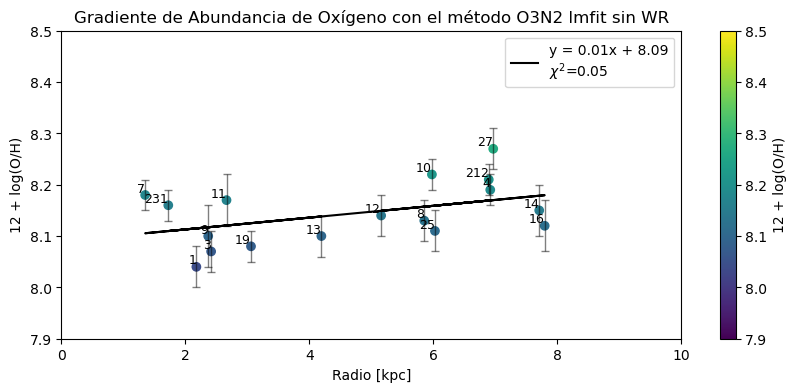

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano.csv', delimiter=',')
df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.5)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit sin WR')
plt.xlim(0, 10)
plt.ylim(7.9, 8.5)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_3722/2653676965.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


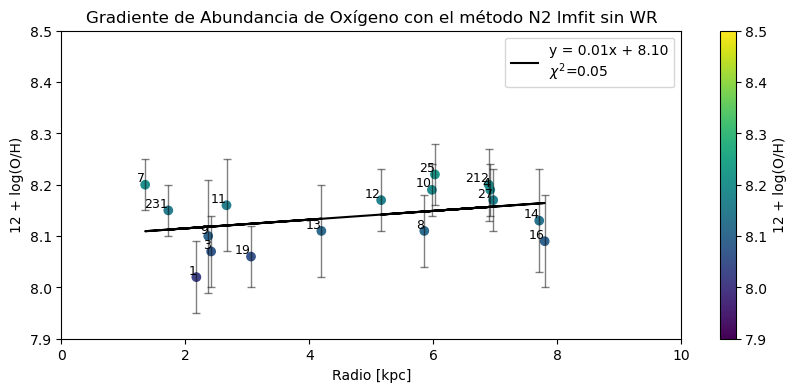

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano.csv', delimiter=',')
df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.5)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit sin WR')
plt.xlim(0, 10)
plt.ylim(7.9, 8.5)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1032/1042221619.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


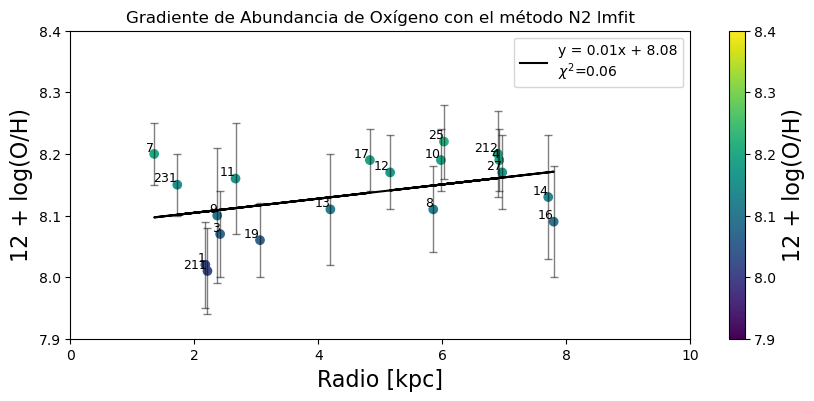

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano.csv', delimiter=',')
#df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_985/786612703.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


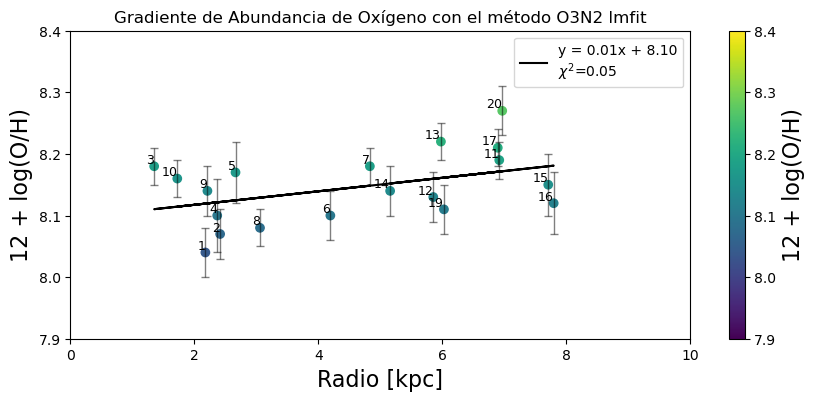

In [2]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_newnumber.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1973503878.py:36: SyntaxWarning: invalid escape sequence '\o'
  cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1973503878.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


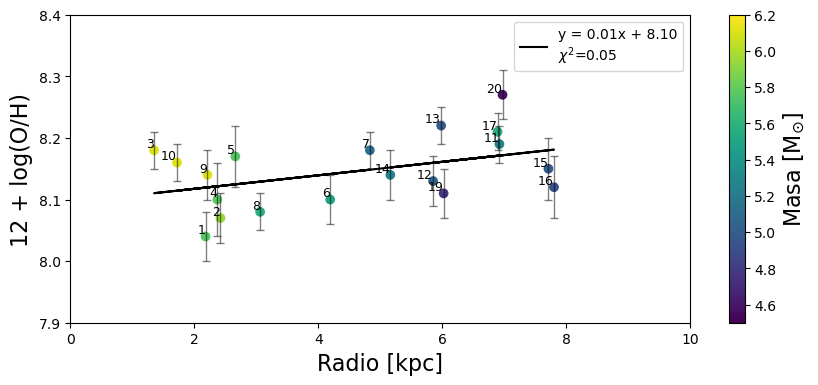

In [1]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['mass'], cmap='viridis', vmin=4.5, vmax=6.2)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1625501115.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


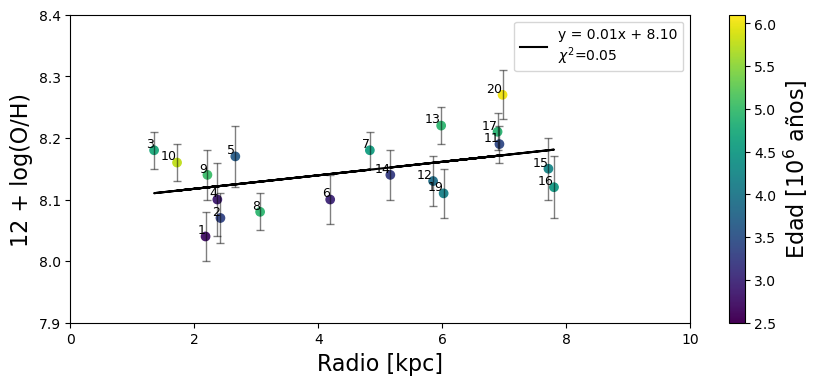

In [3]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['age'], cmap='viridis', vmin=2.5, vmax=6.1)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Edad [10$^6$ años]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1540252366.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


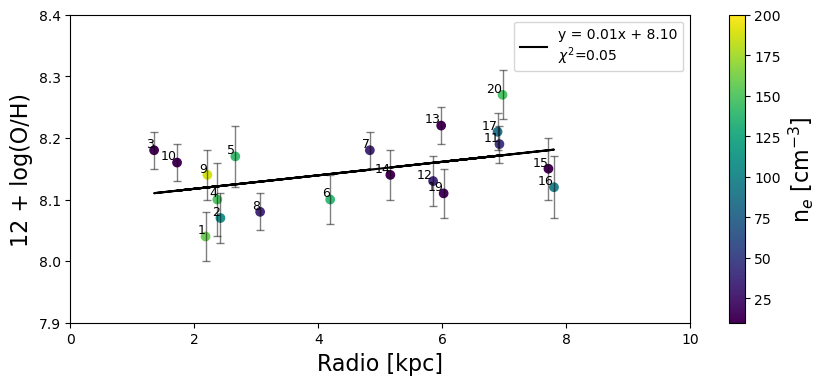

In [4]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/3222999601.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


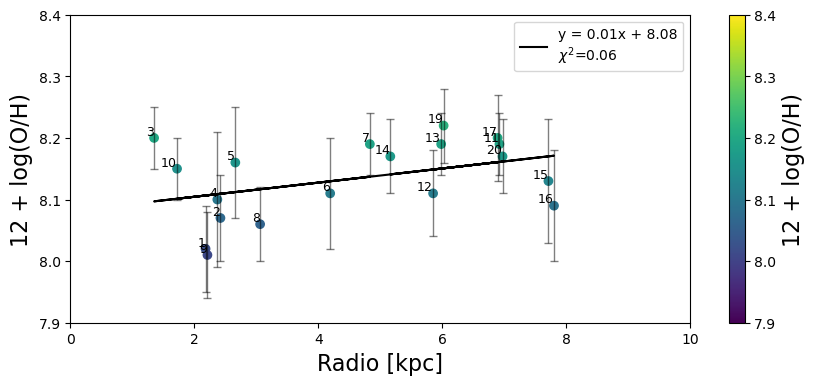

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
#df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:35: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\o'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1820120227.py:35: SyntaxWarning: invalid escape sequence '\o'
  cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1820120227.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


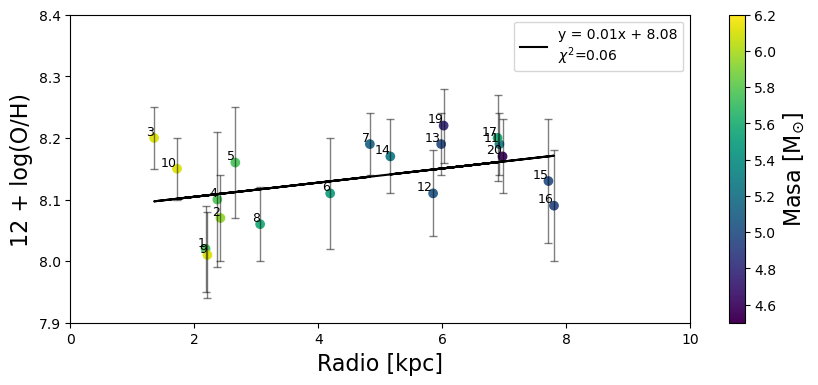

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
#df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['mass'], cmap='viridis', vmin=4.5, vmax=6.2)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Masa [M$_{\odot}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/1020517126.py:38: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


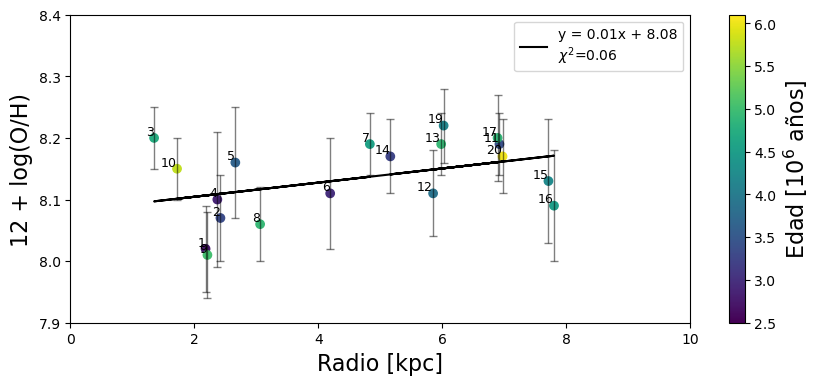

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
#df = df.drop(index=[6,8])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['age'], cmap='viridis', vmin=2.5, vmax=6.1)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Edad [10$^6$ años]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)',fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2228/715777005.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


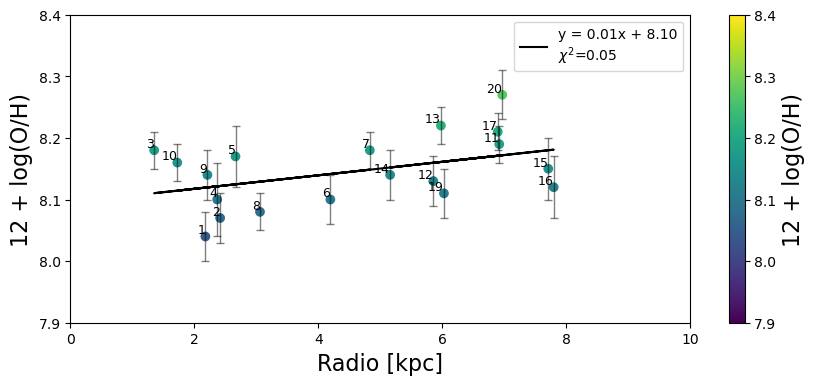

In [11]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_newnumber.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

In [7]:
#gradiente test galactocéntricoimport pandas as pd
import numpy as np

# Cargar los datos de posiciones
df_pos = pd.read_csv('output_scarano.csv', delimiter=',')

# Convertir theta_deg a radianes
theta_rad = np.deg2rad(df_pos['theta_deg'])

# Calcular coordenadas cartesianas x_kpc y y_kpc
x_kpc = df_pos['r_kpc'] * np.sin(theta_rad)
y_kpc = df_pos['r_kpc'] * np.cos(theta_rad)

# Centrar los datos para PCA
x_mean = np.mean(x_kpc)
y_mean = np.mean(y_kpc)
x_centered = x_kpc - x_mean
y_centered = y_kpc - y_mean

# Matriz de covarianza
cov_matrix = np.cov(x_centered, y_centered)

# Calcular autovalores y autovectores
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Ordenar por autovalores descendentes
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# El primer autovector es la dirección del eje principal
major_axis = eig_vecs[:, 0]

# Calcular la distancia con signo a lo largo del eje principal
signed_distance = x_kpc * major_axis[0] + y_kpc * major_axis[1]

# Agregar la distancia con signo al DataFrame
df_pos['signed_distance_kpc'] = signed_distance

# Guardar el resultado en un nuevo archivo CSV
df_pos[['ID', 'signed_distance_kpc']].to_csv('signed_distances.csv', index=False)

print("Distancias con signo calculadas y guardadas en 'signed_distances.csv'")

Distancias con signo calculadas y guardadas en 'signed_distances.csv'


<>:44: SyntaxWarning: invalid escape sequence '\c'
<>:44: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1431/3061311862.py:44: SyntaxWarning: invalid escape sequence '\c'
  color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


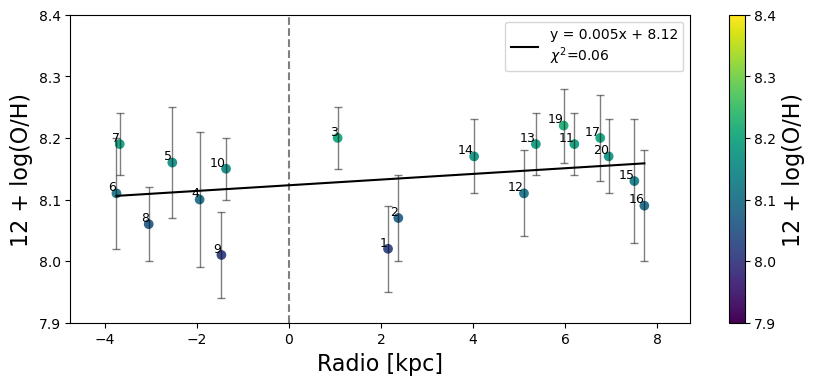

In [7]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos de abundancia y distancias con signo
df_abund = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')

# Unir los DataFrames usando la columna ID
df = pd.merge(df_abund, df_signed, on='ID')

# Definir la función lineal para el ajuste
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo y ajustar los datos
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['signed_distance_kpc'], slope=-0.1, intercept=8.2)

# Extraer los parámetros ajustados
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['signed_distance_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], 
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con colorbar
sc = plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], 
                 cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)', fontsize=16)

# Graficar la línea de regresión ajustada
sorted_idx = np.argsort(df['signed_distance_kpc'])
plt.plot(df['signed_distance_kpc'][sorted_idx], result.best_fit[sorted_idx], 
         color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas con los IDs
for i, row in df.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), 
             fontsize=9, ha='right', va='bottom')

# Etiquetas y límites
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.axvline(x=0, linestyle='--', color='gray', zorder=0)
plt.xlim(min(df['signed_distance_kpc']) - 1, max(df['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2224/1837311270.py:39: SyntaxWarning: invalid escape sequence '\c'
  color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


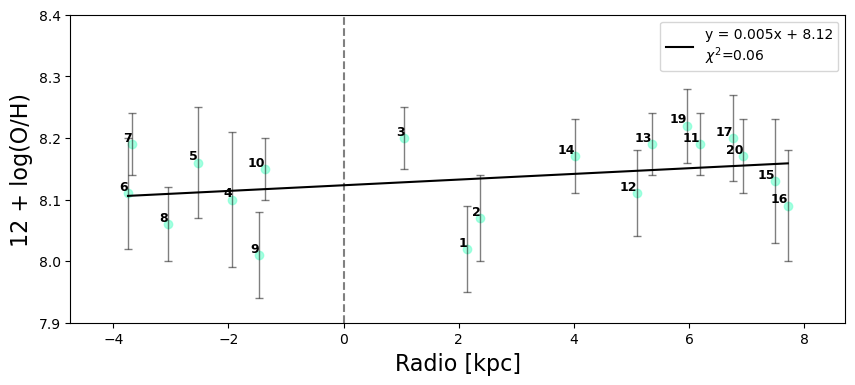

In [11]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos
df_abund = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')

# Unir los DataFrames usando la columna ID
df = pd.merge(df_abund, df_signed, on='ID')

# Definir la función lineal para el ajuste
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo y ajustar los datos
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['signed_distance_kpc'], slope=-0.1, intercept=8.2)

# Extraer los parámetros ajustados
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['signed_distance_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], 
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color calipso opaco
plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], color='#7FFFD4', alpha=0.7)

# Graficar la línea de regresión ajustada
sorted_idx = np.argsort(df['signed_distance_kpc'])
plt.plot(df['signed_distance_kpc'][sorted_idx], result.best_fit[sorted_idx], 
         color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas con los IDs en negrita
for i, row in df.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), 
             fontsize=9, ha='right', va='bottom', weight='bold')

# Etiquetas y límites
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.axvline(x=0, linestyle='--', color='gray', zorder=0)
plt.xlim(min(df['signed_distance_kpc']) - 1, max(df['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:40: SyntaxWarning: invalid escape sequence '\c'
<>:40: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1431/4130371054.py:40: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.3f}")


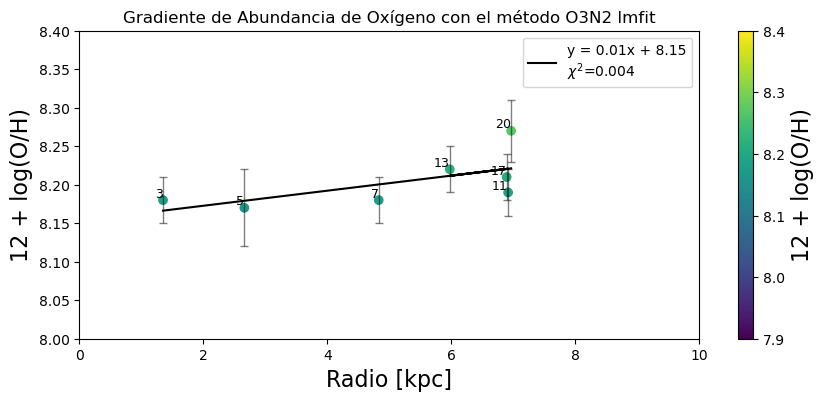

In [15]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_newnumber.csv', delimiter=',')
df = df.drop(index=[0,1,3,5,7,8,9,11,13,14,15,17])

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.3f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 lmfit')
plt.xlim(0, 10)
plt.ylim(8.0, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:45: SyntaxWarning: invalid escape sequence '\c'
<>:45: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_1431/2585002185.py:45: SyntaxWarning: invalid escape sequence '\c'
  color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.3f}")


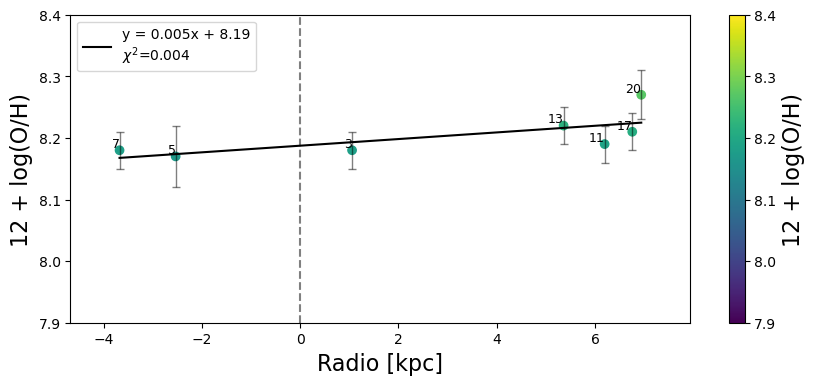

In [14]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos de abundancia y distancias con signo
df_abund_O3N2 = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_abund_O3N2 = df_abund_O3N2.drop(index=[0,1,3,5,7,8,9,11,13,14,15,17])
df_signed_O3N2 = pd.read_csv('signed_distances.csv', delimiter=',')

# Unir los DataFrames usando la columna ID
df_O3N2 = pd.merge(df_abund_O3N2, df_signed_O3N2, on='ID')

# Definir la función lineal para el ajuste
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo y ajustar los datos
model = Model(linear)
result = model.fit(df_O3N2['12_LOG_OH_O3N2'], x=df_O3N2['signed_distance_kpc'], slope=-0.1, intercept=8.2)

# Extraer los parámetros ajustados
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df_O3N2['signed_distance_kpc'], df_O3N2['12_LOG_OH_O3N2'], yerr=df_O3N2['12_LOG_OH_O3N2_ERR'], 
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con colorbar
sc_O3N2 = plt.scatter(df_O3N2['signed_distance_kpc'], df_O3N2['12_LOG_OH_O3N2'], c=df_O3N2['12_LOG_OH_O3N2'], 
                 cmap='viridis', vmin=7.9, vmax=8.4)

# Agregar colorbar
cbar = plt.colorbar(sc_O3N2)
cbar.set_label('12 + log(O/H)', fontsize=16)

# Graficar la línea de regresión ajustada
sorted_idx = np.argsort(df_O3N2['signed_distance_kpc'])
plt.plot(df_O3N2['signed_distance_kpc'][sorted_idx], result.best_fit[sorted_idx], 
         color='black', label=f"y = {slope:.3f}x + {intercept:.2f}\n$\chi^2$={chi_square:.3f}")

# Añadir etiquetas con los IDs
for i, row in df_O3N2.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), 
             fontsize=9, ha='right', va='bottom')

# Etiquetas y límites
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.axvline(x=0, linestyle='--', color='gray', zorder=0)
plt.xlim(min(df_O3N2['signed_distance_kpc']) - 1, max(df_O3N2['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/559951708.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


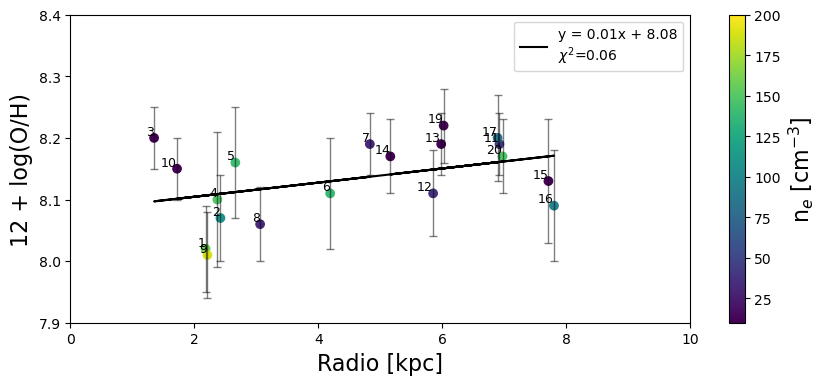

In [4]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit y densidad electronica')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:54: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/2465770178.py:49: SyntaxWarning: invalid escape sequence '\c'
  label=f"izquierda: y = {result_left.params['slope'].value:.3f}x + {result_left.params['intercept'].value:.2f}\n$\chi^2$={result_left.chisqr:.2f}")
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/2465770178.py:54: SyntaxWarning: invalid escape sequence '\c'
  label=f"derecha: y = {result_right.params['slope'].value:.3f}x + {result_right.params['intercept'].value:.2f}\n$\chi^2$={result_right.chisqr:.2f}")
/Users/belen/opt/anaconda3/lib/python3.12/site-packages/lmfit/model.py:1123: UserWarning: The keyword argument yerr does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


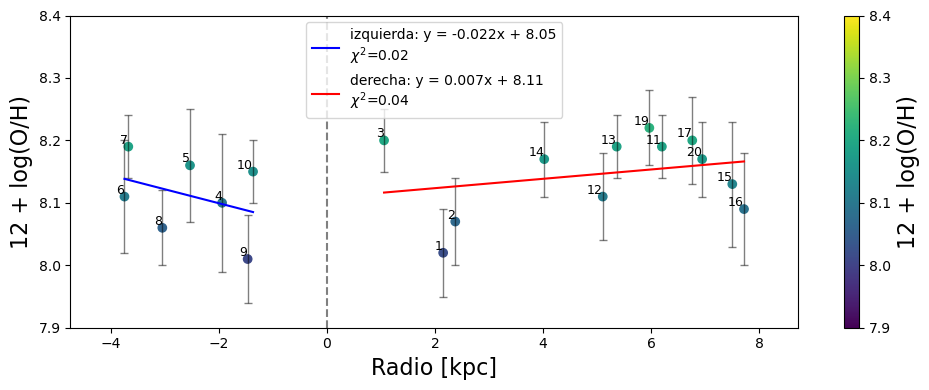

In [5]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos de abundancia y distancias con signo
df_abund = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')

# Unir los DataFrames usando la columna ID
df = pd.merge(df_abund, df_signed, on='ID')

# Separar en dos subconjuntos: distancias negativas y positivas
df_left = df[df['signed_distance_kpc'] < 0]
df_right = df[df['signed_distance_kpc'] >= 0]

# Definir la función lineal para el ajuste
def linear(x, slope, intercept):
    return slope * x + intercept

model = Model(linear)

# Ajuste para la izquierda (distancias negativas)
result_left = model.fit(df_left['12_LOG_OH_N2'], x=df_left['signed_distance_kpc'],
                        yerr=df_left['12_LOG_OH_N2_ERR'], slope=-0.1, intercept=8.2)

# Ajuste para la derecha (distancias positivas)
result_right = model.fit(df_right['12_LOG_OH_N2'], x=df_right['signed_distance_kpc'],
                         yerr=df_right['12_LOG_OH_N2_ERR'], slope=-0.1, intercept=8.2)

# Gráfico
plt.figure(figsize=(10, 4))

# Barras de error
plt.errorbar(df['signed_distance_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'],
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot
sc = plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'],
                 cmap='viridis', vmin=7.9, vmax=8.4)

# Colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)', fontsize=16)

# Línea ajustada para la izquierda
x_left_sorted = np.sort(df_left['signed_distance_kpc'])
plt.plot(x_left_sorted, result_left.eval(x=x_left_sorted), color='blue',
         label=f"izquierda: y = {result_left.params['slope'].value:.3f}x + {result_left.params['intercept'].value:.2f}\n$\chi^2$={result_left.chisqr:.2f}")

# Línea ajustada para la derecha
x_right_sorted = np.sort(df_right['signed_distance_kpc'])
plt.plot(x_right_sorted, result_right.eval(x=x_right_sorted), color='red',
         label=f"derecha: y = {result_right.params['slope'].value:.3f}x + {result_right.params['intercept'].value:.2f}\n$\chi^2$={result_right.chisqr:.2f}")

# IDs de los puntos
for i, row in df.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])),
             fontsize=9, ha='right', va='bottom')

# Estética del gráfico
plt.axvline(x=0, linestyle='--', color='gray')
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(min(df['signed_distance_kpc']) - 1, max(df['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/2973927852.py:39: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")


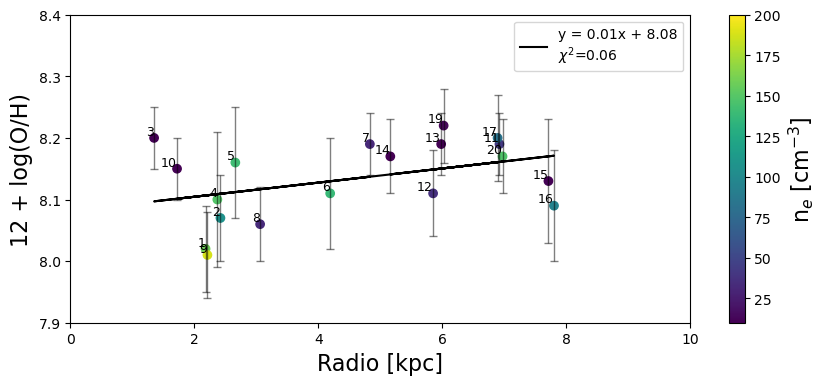

In [6]:
#este es el mismo que sale arriba con O3N2 y lmfit pero con scarano en vez de ds9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], slope=0.01, intercept=8.1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]',fontsize=16)

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
#plt.title('Gradiente de Abundancia de Oxígeno con el método N2 lmfit y densidad electronica')
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()

# Mostrar la gráfica
plt.show()

/Users/belen/opt/anaconda3/lib/python3.12/site-packages/lmfit/model.py:1123: UserWarning: The keyword argument yerr does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


=== AJUSTE LADO IZQUIERDO (x < 0) ===
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02014409
    reduced chi-square = 0.00402882
    Akaike info crit   = -36.9552817
    Bayesian info crit = -37.0634614
    R-squared          = 0.12742188
[[Variables]]
    slope:     -0.02236241 +/- 0.02617061 (117.03%) (init = -0.1)
    intercept:  8.05466357 +/- 0.07063090 (0.88%) (init = 8.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = +0.9405

=== AJUSTE LADO DERECHO (x >= 0) ===
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 12
    # variables        = 2
    chi-square         = 0.03962070
    reduced chi-square = 0.00396207
    Akaike info crit   = -64.5597221
    Bayesian info crit = -63.5899088
    R-squared          = 0.07138980
[[Var

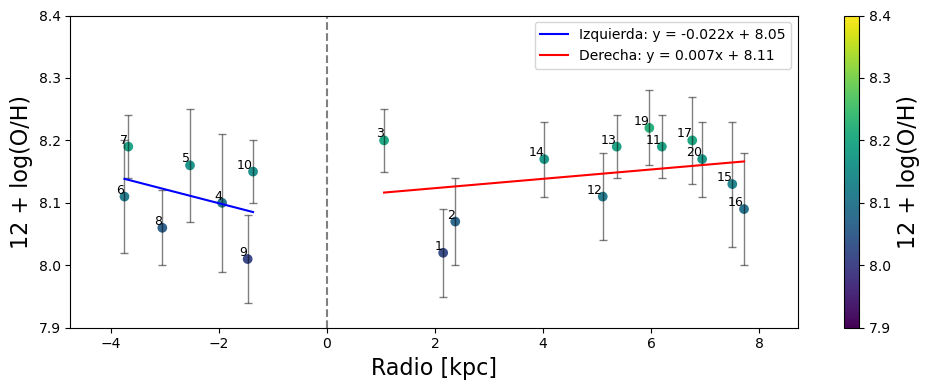

In [7]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

# Cargar los datos
df_abund = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber.csv', delimiter=',')
df_signed = pd.read_csv('signed_distances.csv', delimiter=',')
df = pd.merge(df_abund, df_signed, on='ID')

# Separar datos
df_left = df[df['signed_distance_kpc'] < 0]
df_right = df[df['signed_distance_kpc'] >= 0]

# Función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

model = Model(linear)

# Ajuste lado izquierdo
result_left = model.fit(df_left['12_LOG_OH_N2'], x=df_left['signed_distance_kpc'],
                        yerr=df_left['12_LOG_OH_N2_ERR'], slope=-0.1, intercept=8.2)

# Ajuste lado derecho
result_right = model.fit(df_right['12_LOG_OH_N2'], x=df_right['signed_distance_kpc'],
                         yerr=df_right['12_LOG_OH_N2_ERR'], slope=-0.1, intercept=8.2)

# Imprimir reportes detallados
print("=== AJUSTE LADO IZQUIERDO (x < 0) ===")
print(result_left.fit_report())

print("\n=== AJUSTE LADO DERECHO (x >= 0) ===")
print(result_right.fit_report())

# Graficar
plt.figure(figsize=(10, 4))
plt.errorbar(df['signed_distance_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'],
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

sc = plt.scatter(df['signed_distance_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'],
                 cmap='viridis', vmin=7.9, vmax=8.4)
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)', fontsize=16)

# Ajustes
x_left_sorted = np.sort(df_left['signed_distance_kpc'])
plt.plot(x_left_sorted, result_left.eval(x=x_left_sorted), color='blue',
         label=f"Izquierda: y = {result_left.params['slope'].value:.3f}x + {result_left.params['intercept'].value:.2f}")

x_right_sorted = np.sort(df_right['signed_distance_kpc'])
plt.plot(x_right_sorted, result_right.eval(x=x_right_sorted), color='red',
         label=f"Derecha: y = {result_right.params['slope'].value:.3f}x + {result_right.params['intercept'].value:.2f}")

# IDs
for i, row in df.iterrows():
    plt.text(row['signed_distance_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])),
             fontsize=9, ha='right', va='bottom')

plt.axvline(x=0, linestyle='--', color='gray')
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(min(df['signed_distance_kpc']) - 1, max(df['signed_distance_kpc']) + 1)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:53: SyntaxWarning: invalid escape sequence '\c'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_813/564842614.py:53: SyntaxWarning: invalid escape sequence '\c'
  label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$ = {chi_square:.2f}")
/Users/belen/opt/anaconda3/lib/python3.12/site-packages/lmfit/model.py:1123: UserWarning: The keyword argument yerr does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


===== RESULTADOS DEL AJUSTE =====
Pendiente (slope)       = 0.01149 ± 0.00630
Intercepto (intercept)  = 8.08150 ± 0.03166
Número de puntos (ndata)= 19
Grados de libertad (dof)= 17
Chi-cuadrado (χ²)       = 0.060
Chi-cuadrado reducido   = 0.004

--- Reporte completo de lmfit ---
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 19
    # variables        = 2
    chi-square         = 0.05957370
    reduced chi-square = 0.00350434
    Akaike info crit   = -105.534620
    Bayesian info crit = -103.645742
    R-squared          = 0.16378519
[[Variables]]
    slope:      0.01148929 +/- 0.00629637 (54.80%) (init = 0.01)
    intercept:  8.08150469 +/- 0.03165659 (0.39%) (init = 8.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9033


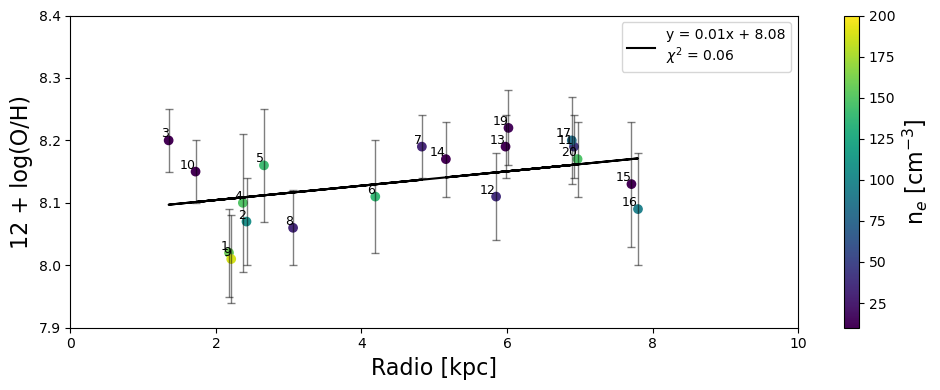

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_N2'], x=df['r_kpc'], yerr=df['12_LOG_OH_N2_ERR'], slope=0.01, intercept=8.1)

# Extraer parámetros importantes
slope = result.params['slope'].value
slope_err = result.params['slope'].stderr
intercept = result.params['intercept'].value
intercept_err = result.params['intercept'].stderr
chi_square = result.chisqr
red_chi_square = result.redchi
dof = result.nfree
ndata = result.ndata

# Mostrar los resultados estadísticos
print("===== RESULTADOS DEL AJUSTE =====")
print(f"Pendiente (slope)       = {slope:.5f} ± {slope_err:.5f}")
print(f"Intercepto (intercept)  = {intercept:.5f} ± {intercept_err:.5f}")
print(f"Número de puntos (ndata)= {ndata}")
print(f"Grados de libertad (dof)= {dof}")
print(f"Chi-cuadrado (χ²)       = {chi_square:.3f}")
print(f"Chi-cuadrado reducido   = {red_chi_square:.3f}")
print("\n--- Reporte completo de lmfit ---")
print(result.fit_report())

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'],
             fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['n_e'], cmap='viridis', vmin=10, vmax=200)
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]', fontsize=16)

# Graficar línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black',
         label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$ = {chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas del gráfico
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()


/Users/belen/opt/anaconda3/lib/python3.12/site-packages/lmfit/model.py:1123: UserWarning: The keyword argument yerr does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +


===== RESULTADOS DEL AJUSTE =====
Pendiente (slope)       = 0.01149 ± 0.00630
Intercepto (intercept)  = 8.08150 ± 0.03166
Número de puntos (ndata)= 19
Grados de libertad (dof)= 17
Chi-cuadrado (χ²)       = 0.060
Chi-cuadrado reducido   = 0.004

--- Reporte completo de lmfit ---
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 19
    # variables        = 2
    chi-square         = 0.05957370
    reduced chi-square = 0.00350434
    Akaike info crit   = -105.534620
    Bayesian info crit = -103.645742
    R-squared          = 0.16378519
[[Variables]]
    slope:      0.01148929 +/- 0.00629637 (54.80%) (init = 0.01)
    intercept:  8.08150469 +/- 0.03165659 (0.39%) (init = 8.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9033


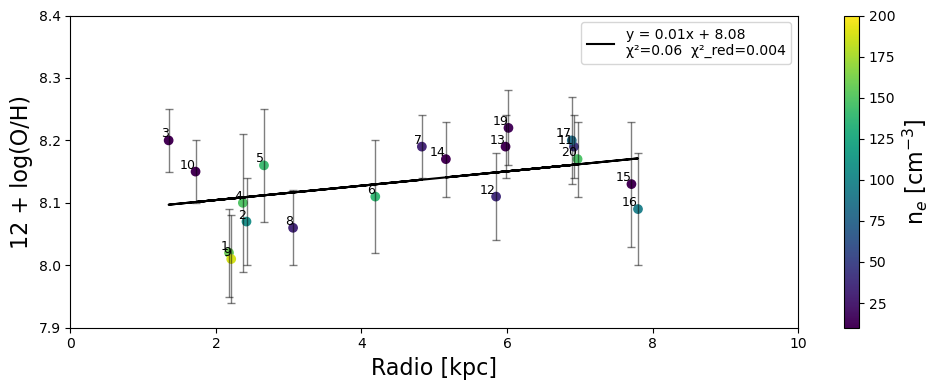

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_scarano_ne_masa_edad_newnumber_ne10.csv', delimiter=',')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit
model = Model(linear)

# Realizar el ajuste, PASANDO yerr para que χ² se calcule como sum((residual/σ_i)**2)
result = model.fit(
    df['12_LOG_OH_N2'],
    x=df['r_kpc'],
    yerr=df['12_LOG_OH_N2_ERR'],
    slope=0.01,
    intercept=8.1
)

# Extraer parámetros y estadísticos
slope = result.params['slope'].value
slope_err = result.params['slope'].stderr
intercept = result.params['intercept'].value
intercept_err = result.params['intercept'].stderr

chi_square = result.chisqr       # χ² bruto
red_chi_square = result.redchi   # χ² reducido
ndata = result.ndata             # número de datos
dof = result.nfree               # grados de libertad = ndata - n_params

# Imprimir en consola los resultados
print("===== RESULTADOS DEL AJUSTE =====")
print(f"Pendiente (slope)       = {slope:.5f} ± {slope_err:.5f}")
print(f"Intercepto (intercept)  = {intercept:.5f} ± {intercept_err:.5f}")
print(f"Número de puntos (ndata)= {ndata}")
print(f"Grados de libertad (dof)= {dof}")
print(f"Chi-cuadrado (χ²)       = {chi_square:.3f}")
print(f"Chi-cuadrado reducido   = {red_chi_square:.3f}")
print("\n--- Reporte completo de lmfit ---")
print(result.fit_report())

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(
    df['r_kpc'],
    df['12_LOG_OH_N2'],
    yerr=df['12_LOG_OH_N2_ERR'],
    fmt='none',
    ecolor='black',
    capsize=3,
    alpha=0.5,
    elinewidth=1
)

# Scatter plot con color bar
sc = plt.scatter(
    df['r_kpc'],
    df['12_LOG_OH_N2'],
    c=df['n_e'],
    cmap='viridis',
    vmin=10,
    vmax=200
)
cbar = plt.colorbar(sc)
cbar.set_label('n$_e$ [cm$^{-3}$]', fontsize=16)

# Graficar línea de regresión ajustada
plt.plot(
    df['r_kpc'],
    result.best_fit,
    color='black',
    label=f"y = {slope:.2f}x + {intercept:.2f}\nχ²={chi_square:.2f}  χ²_red={red_chi_square:.3f}"
)

# Añadir etiquetas de los puntos con ID
for _, row in df.iterrows():
    plt.text(
        row['r_kpc'],
        row['12_LOG_OH_N2'],
        str(int(row['ID'])),
        fontsize=9,
        ha='right',
        va='bottom'
    )

# Etiquetas del gráfico
plt.xlabel('Radio [kpc]', fontsize=16)
plt.ylabel('12 + log(O/H)', fontsize=16)
plt.xlim(0, 10)
plt.ylim(7.9, 8.4)
plt.legend()
plt.tight_layout()
plt.show()
